In [1]:
from proxy_methods_final import *
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import ttest_rel


/Users/alex_1/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# set global plotting format
plt.style.use('seaborn-v0_8-bright')
plt.style.use('seaborn-v0_8-darkgrid')

# Load data

In [3]:
#Original Prices data
#-----------------------------------------
prices_data = pd.read_csv('data/reshaped_data.csv')
prices_data['Date'] = pd.to_datetime(prices_data['Date'], infer_datetime_format=True)
prices_data = prices_data.set_index('Date')

#Cleaned Prices data
#-----------------------------------------
prices_data_cleaned = pd.read_csv('data/new_reshaped_data.csv')
prices_data_cleaned['Date'] = pd.to_datetime(prices_data_cleaned['Date'], infer_datetime_format=True)
prices_data_cleaned = prices_data_cleaned.set_index('Date')


#Index data
#-----------------------------------------
index_data = pd.read_csv('ITRAXX-Europe Timeseries 20241127.csv') #To be used for b0
index_data.rename(columns={'AsOf':'Date'}, inplace=True)
try:
    index_data['Date'] = pd.to_datetime(index_data['Date'], format='%d-%b-%y')
except Exception as e:
    index_data['Date'] = pd.to_datetime(index_data['Date'], format='%d/%b/%y')
index_data = index_data.sort_values(by='Date', ascending=True)

#Metadata
#-----------------------------------------
metadata = pd.read_csv('data/metadata.csv')

#Cleaned Metadata 

metadata_cleaned = pd.read_csv('data/new_metadata.csv')


/var/folders/rc/tn2ys5g55157vhhlmn0_vfwr0000gq/T/ipykernel_83216/2327995567.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  prices_data['Date'] = pd.to_datetime(prices_data['Date'], infer_datetime_format=True)
/var/folders/rc/tn2ys5g55157vhhlmn0_vfwr0000gq/T/ipykernel_83216/2327995567.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  prices_data_cleaned['Date'] = pd.to_datetime(prices_data_cleaned['Date'], infer_datetime_format=True)


In [4]:
metadata_cleaned

,Ticker,ShortName,Sector,Region,Country,AverageRating
0,ABE,Abertis Infraestructuras SA,Cyclical,Europe,Spain,medium
1,ABHLTD,Alliance Boots Hldgs Ltd,Cyclical,Europe,United Kingdom,medium
2,ACAFP,Cr Agricole SA,Financials,Europe,France,low
3,ACAFP-CIB,Cr Agricole Corporate and Invt Bk,Financials,Europe,France,medium
4,ACCOR,ACCOR,Cyclical,Europe,France,medium
...,...,...,...,...,...,...
263,WENL,WENDEL,Financials,Europe,France,medium
264,WOLKLU,Wolters Kluwer N V,Cyclical,Europe,Netherlands,medium
265,WPPGRP-2005,WPP 2005 Ltd,Cyclical,Europe,United Kingdom,high
266,YORPOW,Yorkshire Pwr Gp Ltd,Non Cyclical,Europe,United Kingdom,medium


In [5]:
# # #Remove IFX-HldgBV from prices_data_cleaned

# prices_data_cleaned = prices_data_cleaned.drop(columns=['IFX-HldgBV'])

# Clean data
---

In [6]:
# prices_data_means = prices_data.mean(axis = 0)  #Accross columns

# #Return ticker with highest mean price

# highest_mean_price_ticker = prices_data_means.idxmax()
# highest_mean_price_ticker


In [7]:
# # Get tickers where mean price is greater than 400


# prices_data_means_excluded = prices_data_means[prices_data_means > 400]
# print(prices_data_means_excluded)

# prices_data_means = prices_data_means[prices_data_means < 400]


# plt.figure(figsize=(10, 6))
# plt.bar(prices_data_means.index, prices_data_means)

In [8]:
# prices_data_cleaned_df = prices_data[prices_data.columns[prices_data.columns.isin(prices_data_means.index)]]

# Compare errors 
---

### *  Before clean
---

In [9]:
# standardized_returns = pd.read_csv('data/eur_data_standardized_returns.csv')

# #Filter standardized returns to only include tickers that are in prices_data

# standardized_returns = standardized_returns[standardized_returns.columns[standardized_returns.columns.isin(prices_data_cleaned_df.columns)]]
# standardized_returns.to_csv('data/eur_data_standardized_returns_(TESTING!).csv', index=False)

In [10]:
# print(len(prices_data_cleaned.columns))

In [11]:
# prices_data_cleaned

In [12]:

# #Community detection
# #-----------------------------------------
# correlation_matrix,T,N,company_names = create_correlation_matrix('data/eur_data_standardized_returns.csv')
# C_g = calculate_C_g(correlation_matrix, T, N)
# result_communities, company_communities, modularities = recursive_spectral_method(C_g, correlation_matrix, company_names, min_size=2, modularity_threshold=0.00001)

In [13]:
# #Get matching dates in price data and index data
# #-----------------------------------------
# price_dates = prices_data.index.tolist()

# #Extract date portion of the datetime object in the price data
# index_dates = index_data['Date'].tolist()

# matching_dates = [date for date in price_dates if date in index_dates]

In [14]:
# for community in company_communities:
#     print(community)

In [15]:
# tickers = prices_data.columns.to_list() #All tickers

# #One date
# #-----------
# dates = matching_dates[0:3] #First date

# proxy_time_series_df = calculate_proxy_time_series(tickers, metadata, company_communities, prices_data, index_data, dates)


In [16]:
# prices_data['IFX-HldgBV']

In [17]:
# error_type='MAPE'
# error_intersection_normal_list, error_intersection_communities_list, error_csra_normal_list, error_csra_communities_list = calculate_error_curves(proxy_time_series_df, dates,error_type=error_type)

In [18]:
# errors_df_before_clean = pd.DataFrame({'Data': 'Before Processing','Intersection Normal': error_intersection_normal_list, 'Intersection Communities': error_intersection_communities_list, 'CSRA Normal': error_csra_normal_list, 'CSRA Communities': error_csra_communities_list})
# errors_df_before_clean

In [19]:
# #Calculate absolute percentage error for each ticker

# proxy_time_series_df['Proxy_Intersection_normal_erros'] = np.abs((proxy_time_series_df['Actual_Spread'] - proxy_time_series_df['Proxy_Intersection'])/proxy_time_series_df['Actual_Spread']) * 100
# proxy_time_series_df['Proxy_Intersection_communities_erros'] = np.abs((proxy_time_series_df['Actual_Spread'] - proxy_time_series_df['Proxy_Intersection_Community'])/proxy_time_series_df['Actual_Spread']) * 100
# proxy_time_series_df['Proxy_CSRA_normal_erros'] = np.abs((proxy_time_series_df['Actual_Spread'] - proxy_time_series_df['Proxy_CSRA'])/proxy_time_series_df['Actual_Spread']) * 100
# proxy_time_series_df['Proxy_CSRA_communities_erros'] = np.abs((proxy_time_series_df['Actual_Spread'] - proxy_time_series_df['Proxy_CSRA_Community'])/proxy_time_series_df['Actual_Spread']) * 100
# proxy_time_series_df

In [20]:
# #Print lowest and highest absolute percentage error for each proxy. Include the ticker and the error

# lowest_error_intersection_normal = proxy_time_series_df['Proxy_Intersection_normal_erros'].idxmin()
# highest_error_intersection_normal = proxy_time_series_df['Proxy_Intersection_normal_erros'].idxmax()

# lowest_error_intersection_communities = proxy_time_series_df['Proxy_Intersection_communities_erros'].idxmin()
# highest_error_intersection_communities = proxy_time_series_df['Proxy_Intersection_communities_erros'].idxmax()

# lowest_error_csra_normal = proxy_time_series_df['Proxy_CSRA_normal_erros'].idxmin()
# highest_error_csra_normal = proxy_time_series_df['Proxy_CSRA_normal_erros'].idxmax()

# lowest_error_csra_communities = proxy_time_series_df['Proxy_CSRA_communities_erros'].idxmin()
# highest_error_csra_communities = proxy_time_series_df['Proxy_CSRA_communities_erros'].idxmax()

# print(f'Lowest error for Intersection Normal: {lowest_error_intersection_normal} with error {proxy_time_series_df["Proxy_Intersection_normal_erros"].min()}')
# print(f'Highest error for Intersection Normal: {highest_error_intersection_normal} with error {proxy_time_series_df["Proxy_Intersection_normal_erros"].max()}')

# print(f'Lowest error for Intersection Communities: {lowest_error_intersection_communities} with error {proxy_time_series_df["Proxy_Intersection_communities_erros"].min()}')
# print(f'Highest error for Intersection Communities: {highest_error_intersection_communities} with error {proxy_time_series_df["Proxy_Intersection_communities_erros"].max()}')

# print(f'Lowest error for CSRA Normal: {lowest_error_csra_normal} with error {proxy_time_series_df["Proxy_CSRA_normal_erros"].min()}')
# print(f'Highest error for CSRA Normal: {highest_error_csra_normal} with error {proxy_time_series_df["Proxy_CSRA_normal_erros"].max()}')

# print(f'Lowest error for CSRA Communities: {lowest_error_csra_communities} with error {proxy_time_series_df["Proxy_CSRA_communities_erros"].min()}')
# print(f'Highest error for CSRA Communities: {highest_error_csra_communities} with error {proxy_time_series_df["Proxy_CSRA_communities_erros"].max()}')


In [21]:
# proxy_time_series_df.loc[highest_error_csra_communities]

### * After clean
---

In [22]:

#Community detection
#-----------------------------------------
correlation_matrix,T,N,company_names = create_correlation_matrix('data/eur_data_standardized_returns_(Cleaned).csv')
C_g = calculate_C_g(correlation_matrix, T, N)
result_communities, company_communities, modularities = recursive_spectral_method(C_g, correlation_matrix, company_names, min_size=2, modularity_threshold=0.00001)

In [23]:
for community in company_communities:
    print(community)

['ACCOR', 'AIRLIQ', 'AKZO', 'ALSTOM', 'ATSPA', 'AZN', 'BAD', 'BAPLC', 'BASFSE', 'BATSLN', 'BMW', 'BOUY', 'BPLN', 'BRITEL-BritTel', 'BYIF', 'CARR', 'CENTRI', 'CLAR', 'CONTI', 'CPGLN', 'DAMLR', 'DANONE', 'DEXO', 'DIAG', 'DT', 'EDF', 'ELTLX', 'ENI', 'EXPGRL-EXPFIN', 'FORTUM', 'FSEKGA', 'GSK', 'HEI', 'HEIANA', 'HOFP', 'ITV', 'KDSM', 'KPN', 'LINDE', 'LNX', 'LUFTHA', 'MKS-M+SPlc', 'MOET', 'NESTLE', 'NGP', 'NXT', 'PERNOD', 'PEUGOT', 'PSON', 'PUBFP', 'RDSPLC', 'RENAUL', 'RNTKIL', 'ROLLS', 'SBRY', 'SIEM', 'SOLVAY', 'STGOBN', 'STM', 'STORA', 'SYNNVX', 'TATELN', 'TELNOR', 'TKA', 'TKAGR', 'TOTALN', 'TSCO', 'ULVR', 'UPMKYM', 'UU', 'VEOLIA', 'VINCI', 'VIVNDI', 'VLOF', 'VLVY', 'VOD', 'VW', 'WENL', 'WOLKLU', 'WPPGRP-2005']
['ACAFP', 'AEGON', 'ALZSE', 'ASSGEN', 'AVLN', 'AXAF', 'BACR-Bank', 'BACRED', 'BBVSM', 'BFCM', 'BNP', 'CMZB', 'CSGAG', 'DANBNK', 'DB', 'EDP', 'ENEL', 'IBERDU', 'MUNRE', 'PRUFIN', 'SANPAO', 'SANTNDR', 'SOCGEN', 'STAN-Bank', 'SWREL', 'TELEFO', 'TIIMN', 'UBS', 'USPA', 'ZINCO']
['ABE', '

In [24]:
#Get matching dates in price data and index data
#-----------------------------------------
price_dates = prices_data_cleaned.index.tolist()

#Extract date portion of the datetime object in the price data
index_dates = index_data['Date'].tolist()

matching_dates = [date for date in price_dates if date in index_dates]

In [25]:
tickers = prices_data_cleaned.columns.to_list() #All tickers

#One date
#-----------
dates = matching_dates[0:100] #

proxy_time_series_df = calculate_proxy_time_series(tickers, metadata_cleaned, company_communities, prices_data_cleaned, index_data, dates)


In [26]:
error_type='MAPE'
error_intersection_normal_list, error_intersection_communities_list, error_csra_normal_list, error_csra_communities_list = calculate_error_curves(proxy_time_series_df, dates,error_type=error_type)

#Create dataframe to store errors

In [27]:
errors_df_after_clean = pd.DataFrame({'Date':dates,'Intersection Normal': error_intersection_normal_list, 'Intersection Communities': error_intersection_communities_list, 'CSRA Normal': error_csra_normal_list, 'CSRA Communities': error_csra_communities_list})
errors_df_after_clean

,Date,Intersection Normal,Intersection Communities,CSRA Normal,CSRA Communities
0,2010-09-14,61.703337,60.473280,55.463578,63.966619
1,2010-09-15,61.389837,59.984786,55.344894,63.964324
2,2010-09-16,61.760645,60.610407,55.890523,64.626177
3,2010-09-17,61.559998,60.345661,54.893127,63.594673
4,2010-09-20,61.573495,60.608140,55.162426,63.499434
...,...,...,...,...,...
95,2011-01-25,60.615724,61.804986,56.529527,64.820803
96,2011-01-26,60.619542,61.965743,56.289961,64.529834
97,2011-01-27,61.285356,62.906119,57.016928,64.897577
98,2011-01-28,60.801588,62.647001,56.070685,64.828439


In [28]:
# #Calculate absolute percentage error for each ticker

# proxy_time_series_df['Proxy_Intersection_normal_erros'] = np.abs((proxy_time_series_df['Actual_Spread'] - proxy_time_series_df['Proxy_Intersection'])/proxy_time_series_df['Actual_Spread']) * 100
# proxy_time_series_df['Proxy_Intersection_communities_erros'] = np.abs((proxy_time_series_df['Actual_Spread'] - proxy_time_series_df['Proxy_Intersection_Community'])/proxy_time_series_df['Actual_Spread']) * 100
# proxy_time_series_df['Proxy_CSRA_normal_erros'] = np.abs((proxy_time_series_df['Actual_Spread'] - proxy_time_series_df['Proxy_CSRA'])/proxy_time_series_df['Actual_Spread']) * 100
# proxy_time_series_df['Proxy_CSRA_communities_erros'] = np.abs((proxy_time_series_df['Actual_Spread'] - proxy_time_series_df['Proxy_CSRA_Community'])/proxy_time_series_df['Actual_Spread']) * 100
# proxy_time_series_df

In [29]:
# #Print lowest and highest absolute percentage error for each proxy. Include the ticker and the error

# lowest_error_intersection_normal = proxy_time_series_df['Proxy_Intersection_normal_erros'].idxmin()
# highest_error_intersection_normal = proxy_time_series_df['Proxy_Intersection_normal_erros'].idxmax()

# lowest_error_intersection_communities = proxy_time_series_df['Proxy_Intersection_communities_erros'].idxmin()
# highest_error_intersection_communities = proxy_time_series_df['Proxy_Intersection_communities_erros'].idxmax()

# lowest_error_csra_normal = proxy_time_series_df['Proxy_CSRA_normal_erros'].idxmin()
# highest_error_csra_normal = proxy_time_series_df['Proxy_CSRA_normal_erros'].idxmax()

# lowest_error_csra_communities = proxy_time_series_df['Proxy_CSRA_communities_erros'].idxmin()
# highest_error_csra_communities = proxy_time_series_df['Proxy_CSRA_communities_erros'].idxmax()

# print(f'Lowest error for Intersection Normal: {lowest_error_intersection_normal} with error {proxy_time_series_df["Proxy_Intersection_normal_erros"].min()}')
# print(f'Highest error for Intersection Normal: {highest_error_intersection_normal} with error {proxy_time_series_df["Proxy_Intersection_normal_erros"].max()}')

# print(f'Lowest error for Intersection Communities: {lowest_error_intersection_communities} with error {proxy_time_series_df["Proxy_Intersection_communities_erros"].min()}')
# print(f'Highest error for Intersection Communities: {highest_error_intersection_communities} with error {proxy_time_series_df["Proxy_Intersection_communities_erros"].max()}')

# print(f'Lowest error for CSRA Normal: {lowest_error_csra_normal} with error {proxy_time_series_df["Proxy_CSRA_normal_erros"].min()}')
# print(f'Highest error for CSRA Normal: {highest_error_csra_normal} with error {proxy_time_series_df["Proxy_CSRA_normal_erros"].max()}')

# print(f'Lowest error for CSRA Communities: {lowest_error_csra_communities} with error {proxy_time_series_df["Proxy_CSRA_communities_erros"].min()}')
# print(f'Highest error for CSRA Communities: {highest_error_csra_communities} with error {proxy_time_series_df["Proxy_CSRA_communities_erros"].max()}')


In [30]:
# highest_error_csra_communities = proxy_time_series_df['Proxy_CSRA_communities_erros'].idxmax()

# #print ticker corresponding to highest error

# proxy_time_series_df.loc[highest_error_csra_normal]

# Comparison 
---

In [31]:
# errors_df = pd.concat([errors_df_before_clean, errors_df_after_clean], ignore_index=True)
errors_df = errors_df_after_clean
errors_df

,Date,Intersection Normal,Intersection Communities,CSRA Normal,CSRA Communities
0,2010-09-14,61.703337,60.473280,55.463578,63.966619
1,2010-09-15,61.389837,59.984786,55.344894,63.964324
2,2010-09-16,61.760645,60.610407,55.890523,64.626177
3,2010-09-17,61.559998,60.345661,54.893127,63.594673
4,2010-09-20,61.573495,60.608140,55.162426,63.499434
...,...,...,...,...,...
95,2011-01-25,60.615724,61.804986,56.529527,64.820803
96,2011-01-26,60.619542,61.965743,56.289961,64.529834
97,2011-01-27,61.285356,62.906119,57.016928,64.897577
98,2011-01-28,60.801588,62.647001,56.070685,64.828439


In [32]:
# errors_df.to_csv('data/errors_df_before_aggregation.csv', index=False)

In [ ]:
# errors_df.to_csv('data/errors_df_after_aggregation.csv', index=False)

In [34]:
errors_df_before_aggregation = pd.read_csv('data/errors_df_before_aggregation.csv')

#errors_df_after_aggregation = pd.read_csv('data/errors_df_after_aggregation.csv')

In [35]:
errors_df_before_aggregation

,Date,Intersection Normal,Intersection Communities,CSRA Normal,CSRA Communities
0,2010-09-14,62.611992,61.185150,57.955136,63.542753
1,2010-09-15,62.080504,60.542046,57.879560,63.205205
2,2010-09-16,62.668155,61.351568,58.112468,64.122759
3,2010-09-17,62.850302,61.530968,57.202351,62.963218
4,2010-09-20,63.358665,62.324119,57.696729,62.821218
...,...,...,...,...,...
95,2011-01-25,64.475184,64.796410,59.509734,64.476825
96,2011-01-26,64.387989,64.829756,59.113720,64.112528
97,2011-01-27,64.755039,65.258071,59.972297,64.404943
98,2011-01-28,64.322166,64.964894,58.952720,64.544510


In [38]:
errors_df_after_aggregation = pd.read_csv('data/errors_df_after_aggregation.csv')
errors_df_after_aggregation

,Date,Intersection Normal,Intersection Communities,CSRA Normal,CSRA Communities
0,2010-09-14,61.703337,60.473280,55.463578,63.966619
1,2010-09-15,61.389837,59.984786,55.344894,63.964324
2,2010-09-16,61.760645,60.610407,55.890523,64.626177
3,2010-09-17,61.559998,60.345661,54.893127,63.594673
4,2010-09-20,61.573495,60.608140,55.162426,63.499434
...,...,...,...,...,...
95,2011-01-25,60.615724,61.804986,56.529527,64.820803
96,2011-01-26,60.619542,61.965743,56.289961,64.529834
97,2011-01-27,61.285356,62.906119,57.016928,64.897577
98,2011-01-28,60.801588,62.647001,56.070685,64.828439


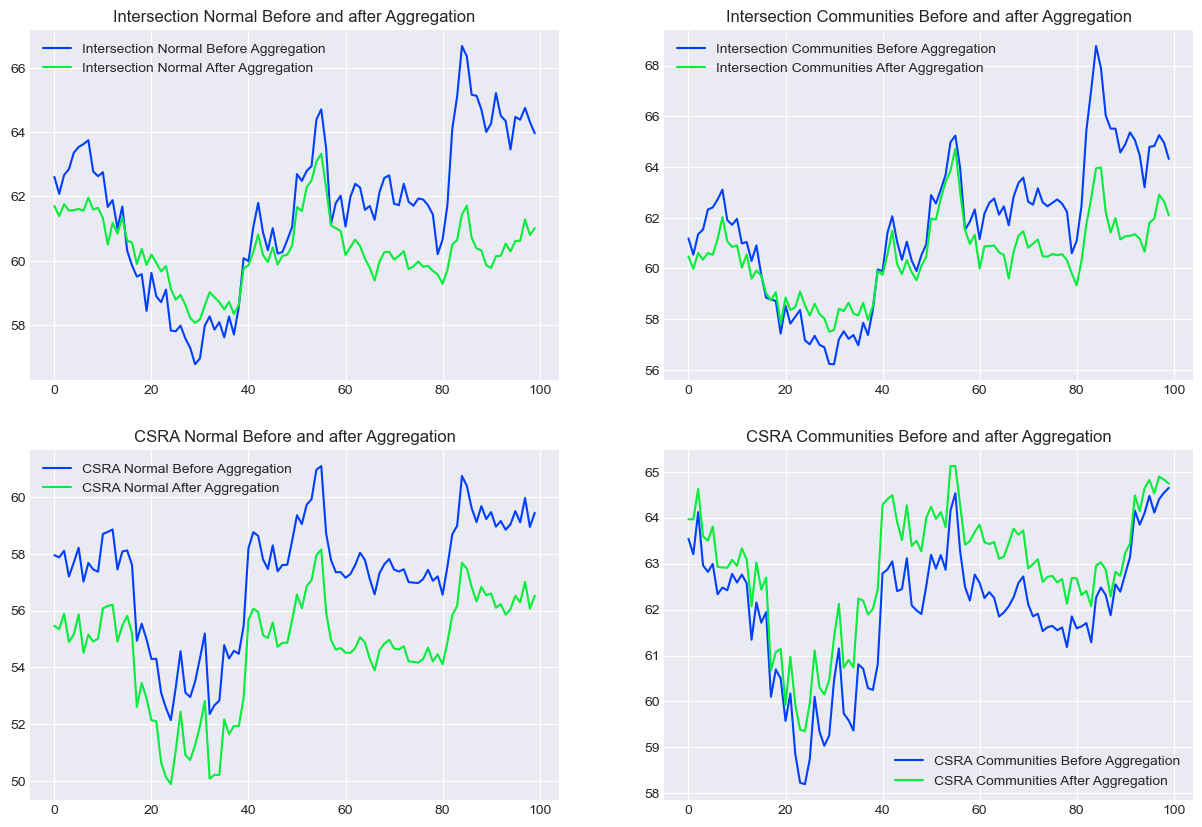

In [39]:
Intersection_normal_before_aggregation = errors_df_before_aggregation['Intersection Normal']
Intersection_communities_before_aggregation = errors_df_before_aggregation['Intersection Communities']
CSRA_normal_before_aggregation = errors_df_before_aggregation['CSRA Normal']
CSRA_communities_before_aggregation = errors_df_before_aggregation['CSRA Communities']

Intersection_normal_after_aggregation = errors_df_after_aggregation['Intersection Normal']
Intersection_communities_after_aggregation = errors_df_after_aggregation['Intersection Communities']
CSRA_normal_after_aggregation = errors_df_after_aggregation['CSRA Normal']
CSRA_communities_after_aggregation = errors_df_after_aggregation['CSRA Communities']

#Plot error curves as sub plots before and after aggregation

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].plot(Intersection_normal_before_aggregation, label='Intersection Normal Before Aggregation')
axs[0,0].plot(Intersection_normal_after_aggregation, label='Intersection Normal After Aggregation')
axs[0, 0].set_title('Intersection Normal Before and after Aggregation')
axs[0, 0].legend()

axs[0, 1].plot(Intersection_communities_before_aggregation, label='Intersection Communities Before Aggregation')
axs[0,1].plot(Intersection_communities_after_aggregation, label='Intersection Communities After Aggregation')
axs[0, 1].set_title('Intersection Communities Before and after Aggregation')
axs[0, 1].legend()

axs[1, 0].plot(CSRA_normal_before_aggregation, label='CSRA Normal Before Aggregation')
axs[1,0].plot(CSRA_normal_after_aggregation, label='CSRA Normal After Aggregation')
axs[1, 0].set_title('CSRA Normal Before and after Aggregation')
axs[1, 0].legend()

axs[1, 1].plot(CSRA_communities_before_aggregation, label='CSRA Communities Before Aggregation')
axs[1,1].plot(CSRA_communities_after_aggregation, label='CSRA Communities After Aggregation')
axs[1, 1].set_title('CSRA Communities Before and after Aggregation')
axs[1, 1].legend()





